In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
members = pd.read_csv('C:/Users/josen/Documents/MASTER/TFM/Datasets/gym_members_exercise_tracking.csv')

In [15]:
members.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [16]:
print("Unique values in Workout_Frequency (days/week) column:")
print(members['Workout_Frequency (days/week)'].unique())

Unique values in Workout_Frequency (days/week) column:
[4 3 5 2]


In [17]:
members.columns = members.columns.str.replace(r"[()]", "", regex=True)
members.columns = members.columns.str.replace(" ", "_")

In [18]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          973 non-null    int64  
 1   Gender                       973 non-null    object 
 2   Weight_kg                    973 non-null    float64
 3   Height_m                     973 non-null    float64
 4   Max_BPM                      973 non-null    int64  
 5   Avg_BPM                      973 non-null    int64  
 6   Resting_BPM                  973 non-null    int64  
 7   Session_Duration_hours       973 non-null    float64
 8   Calories_Burned              973 non-null    float64
 9   Workout_Type                 973 non-null    object 
 10  Fat_Percentage               973 non-null    float64
 11  Water_Intake_liters          973 non-null    float64
 12  Workout_Frequency_days/week  973 non-null    int64  
 13  Experience_Level    

In [19]:
valores_nulos = members.isnull().sum()

In [20]:
duplicados = members.duplicated().sum()

In [21]:
valores_genero = members['Gender'].unique()
valores_workout_type = members['Workout_Type'].unique()
valores_experience = members['Experience_Level'].unique()

valores_nulos, duplicados, valores_genero, valores_workout_type, valores_experience

(Age                            0
 Gender                         0
 Weight_kg                      0
 Height_m                       0
 Max_BPM                        0
 Avg_BPM                        0
 Resting_BPM                    0
 Session_Duration_hours         0
 Calories_Burned                0
 Workout_Type                   0
 Fat_Percentage                 0
 Water_Intake_liters            0
 Workout_Frequency_days/week    0
 Experience_Level               0
 BMI                            0
 dtype: int64,
 np.int64(0),
 array(['Male', 'Female'], dtype=object),
 array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object),
 array([3, 2, 1]))

In [22]:
members.head()

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days/week,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [23]:
members = members.loc[:, ~members.columns.duplicated()]

In [24]:
members = members.rename(columns={'Experience_Level': 'Level'})

In [25]:
members['Level'] = members['Level'].replace({1: 'Beginner', 2: 'Intermediate', 3: 'Advanced'})

In [26]:
valores_level_final = members['Level'].value_counts()
valores_level_final

Level
Intermediate    406
Beginner        376
Advanced        191
Name: count, dtype: int64

In [27]:
members.drop(columns=['Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Water_Intake_liters'], inplace=True)

In [28]:
members.rename(columns={
    'Session_Duration_hours': 'Workout_time',
    'Workout_Type': 'Type',
    'Workout_Frequency_days/week': 'Frequency'
}, inplace=True)

In [29]:
members.head()

,Age,Gender,Weight_kg,Height_m,Workout_time,Calories_Burned,Type,Fat_Percentage,Frequency,Level,BMI
0,56,Male,88.3,1.71,1.69,1313.0,Yoga,12.6,4,Advanced,30.20
1,46,Female,74.9,1.53,1.30,883.0,HIIT,33.9,4,Intermediate,32.00
2,32,Female,68.1,1.66,1.11,677.0,Cardio,33.4,4,Intermediate,24.71
3,25,Male,53.2,1.70,0.59,532.0,Strength,28.8,3,Beginner,18.41
4,38,Male,46.1,1.79,0.64,556.0,Strength,29.2,3,Beginner,14.39


# 1. Distribución de edades
 Muestra cómo está distribuida la edad de los usuarios. Útil para segmentar recomendaciones por edad.

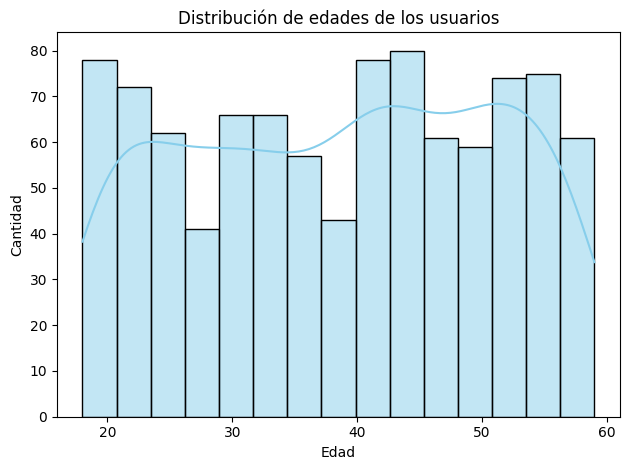

In [30]:
plt.figure()
sns.histplot(members['Age'], bins=15, kde=True, color='skyblue')
plt.title("Distribución de edades de los usuarios")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 2. Distribución por género
 Permite ver si hay equilibrio entre hombres y mujeres en el dataset.

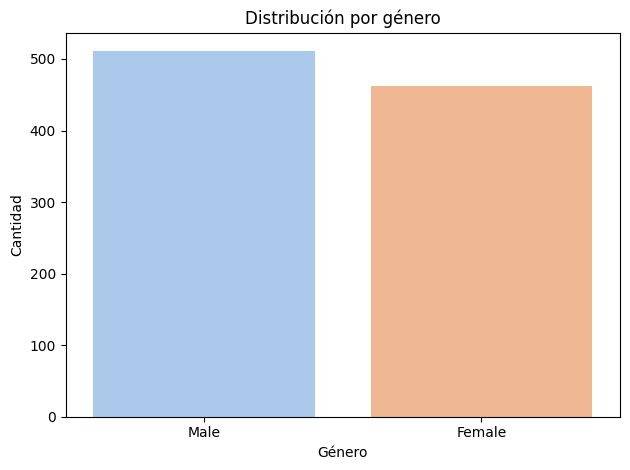

In [31]:
plt.figure()
sns.countplot(data=members, x='Gender', palette='pastel')
plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 3. Distribución por nivel de experiencia
 Identifica cuántos usuarios hay en cada nivel de entrenamiento.

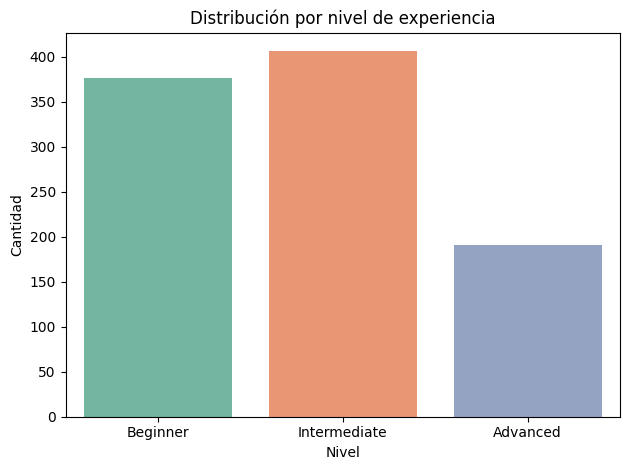

In [32]:
plt.figure()
sns.countplot(data=members, x='Level', order=['Beginner', 'Intermediate', 'Advanced'], palette='Set2')
plt.title("Distribución por nivel de experiencia")
plt.xlabel("Nivel")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 4. Distribución por tipo de entrenamiento
 Muestra las preferencias de los usuarios según el tipo de entrenamiento que realizan.

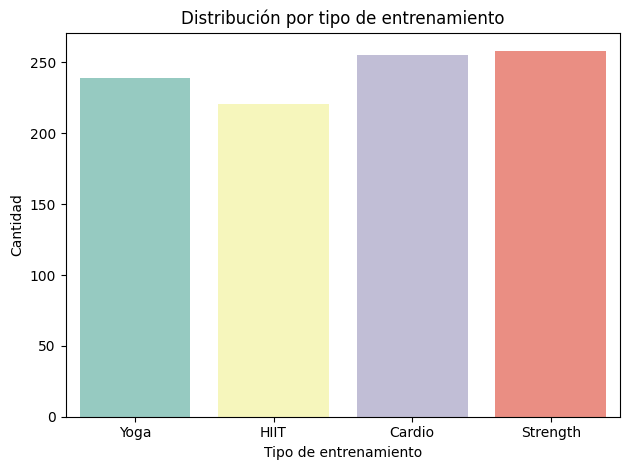

In [33]:
plt.figure()
sns.countplot(data=members, x='Type', palette='Set3')
plt.title("Distribución por tipo de entrenamiento")
plt.xlabel("Tipo de entrenamiento")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 5. Histograma de duración de entrenamiento
 Visualiza cuánto tiempo dedican los usuarios por sesión.

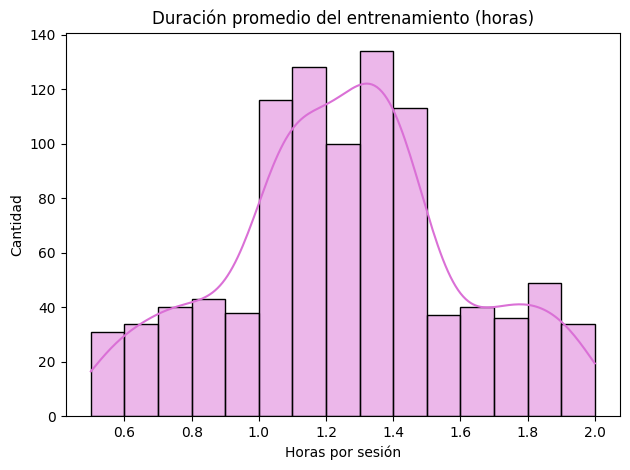

In [34]:
plt.figure()
sns.histplot(members['Workout_time'], bins=15, kde=True, color='orchid')
plt.title("Duración promedio del entrenamiento (horas)")
plt.xlabel("Horas por sesión")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 6. Frecuencia semanal de entrenamiento
 Analiza cuántos días a la semana entrena cada usuario.

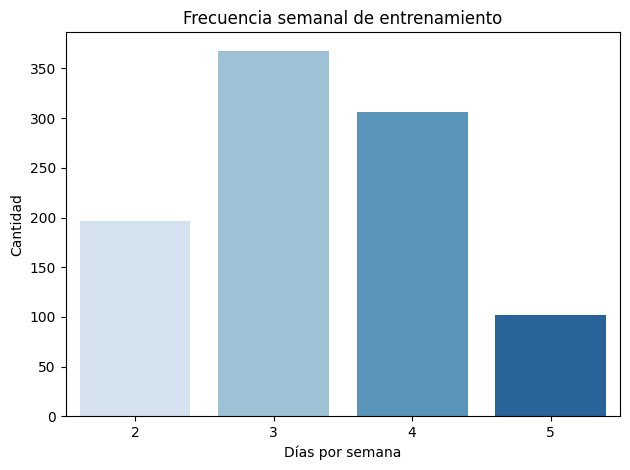

In [35]:
plt.figure()
sns.countplot(data=members, x='Frequency', palette='Blues')
plt.title("Frecuencia semanal de entrenamiento")
plt.xlabel("Días por semana")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 7. Porcentaje de grasa corporal
 Evalúa la distribución del porcentaje de grasa corporal, útil para definir objetivos personalizados.

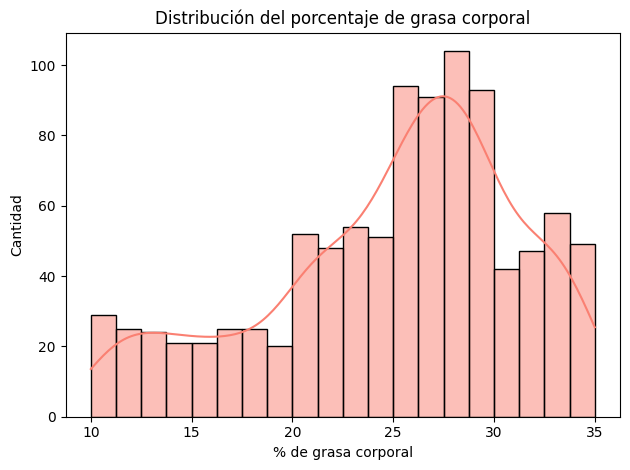

In [36]:
plt.figure()
sns.histplot(members['Fat_Percentage'], bins=20, kde=True, color='salmon')
plt.title("Distribución del porcentaje de grasa corporal")
plt.xlabel("% de grasa corporal")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 8. Índice de Masa Corporal (BMI)
 Permite detectar rangos de peso saludable o problemático.

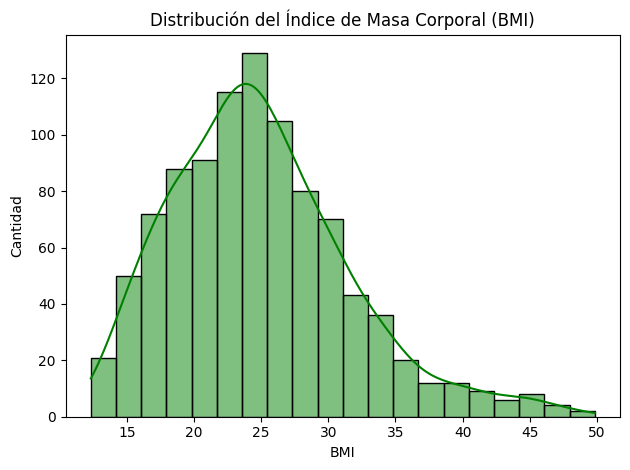

In [37]:
plt.figure()
sns.histplot(members['BMI'], bins=20, kde=True, color='green')
plt.title("Distribución del Índice de Masa Corporal (BMI)")
plt.xlabel("BMI")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# 9. Relación entre Nivel y Tipo de entrenamiento
 Relación cruzada que puede usarse para emparejar ejercicios con el dataset de gym.

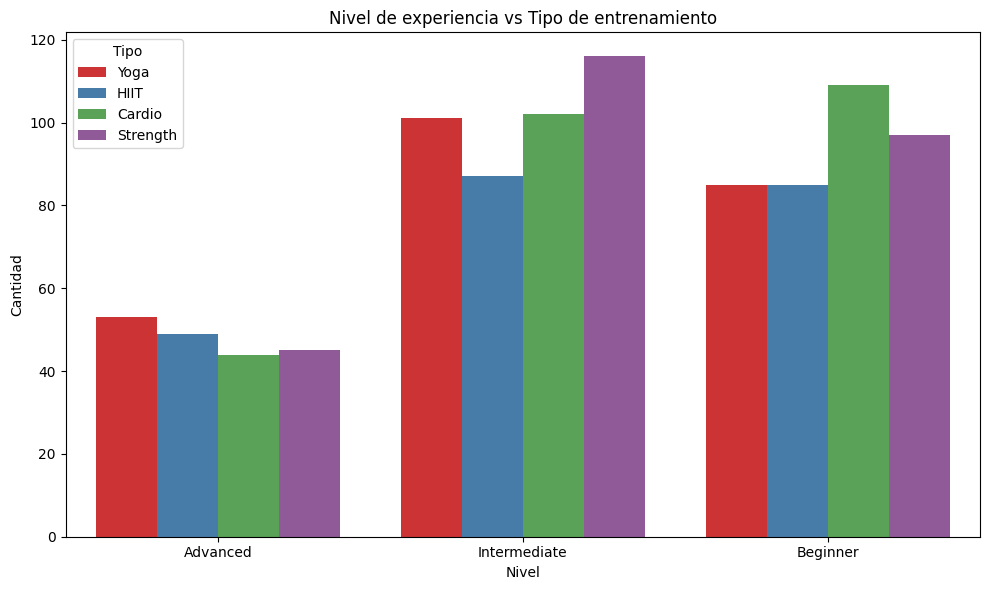

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=members, x='Level', hue='Type', palette='Set1')
plt.title("Nivel de experiencia vs Tipo de entrenamiento")
plt.xlabel("Nivel")
plt.ylabel("Cantidad")
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()

# 10. Relación entre género y nivel
 Muestra si hay diferencias en la experiencia de entrenamiento entre géneros.

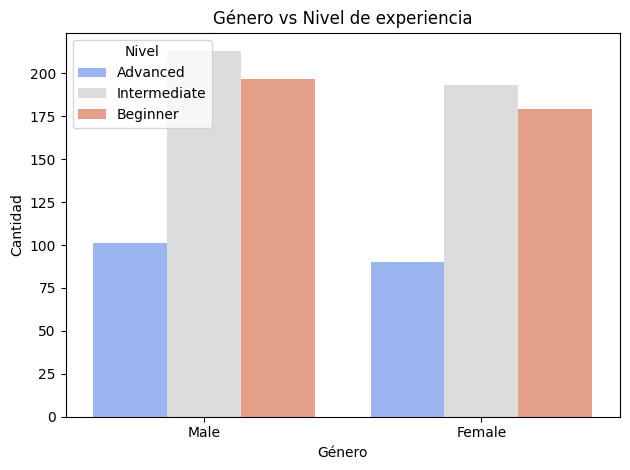

In [39]:
plt.figure()
sns.countplot(data=members, x='Gender', hue='Level', palette='coolwarm')
plt.title("Género vs Nivel de experiencia")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title='Nivel')
plt.tight_layout()
plt.show()

# 11. Relación entre BMI y % de grasa corporal
 Permite identificar correlaciones entre el índice de masa corporal y el % de grasa.

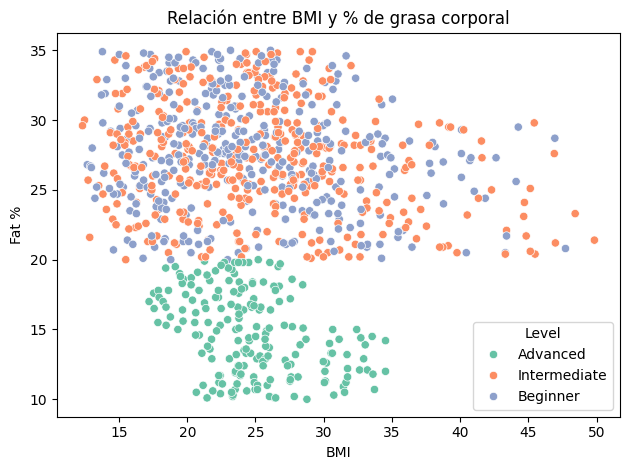

In [40]:
plt.figure()
sns.scatterplot(data=members, x='BMI', y='Fat_Percentage', hue='Level', palette='Set2')
plt.title("Relación entre BMI y % de grasa corporal")
plt.xlabel("BMI")
plt.ylabel("Fat %")
plt.tight_layout()
plt.show()

In [41]:
path_gym = "C:/Users/josen/Documents/MASTER/TFM/Datasets/members.csv"
members.to_csv(path_gym, index=False)